In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

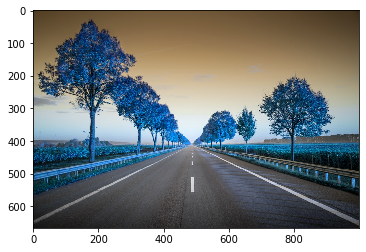

In [21]:
img=cv2.imread(r"E:\NOTES\CVG_Class\road.jfif")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#cv2.imshow("original image",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img,cmap='gray')

Gaussian blur

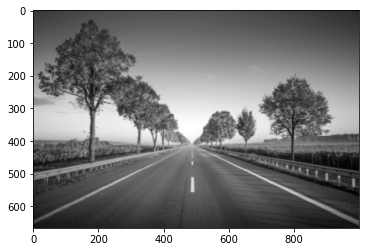

In [20]:
gauss=cv2.GaussianBlur(gray,(9,9),0)
plt.imshow(gauss,cmap='gray')

Canny Edge detection

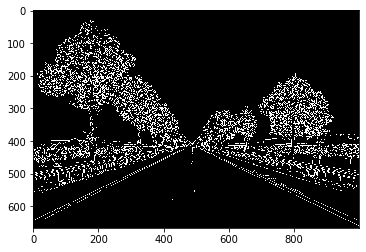

In [23]:
canny=cv2.Canny(gray,100,205)
#cv2.imshow("Canny_edge_detected_image",canny)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(canny,cmap='gray')

Finding region of interest

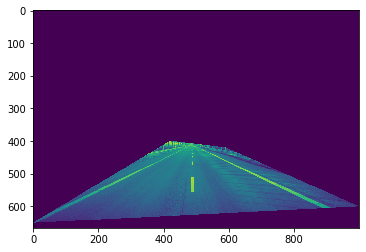

In [30]:
roi=np.array([[(0,650),(420,400),(590,420),(1000,600)]],dtype=np.int32)
mask=np.zeros_like(gray)    #returns an array of zeros with same shape and type of gray
cv2.fillPoly(mask,roi,255)
m_img=cv2.bitwise_and(gray,mask) #calculates the bitwise_and of 2 array,here gray image and the mask
plt.figure()
plt.imshow(m_img)

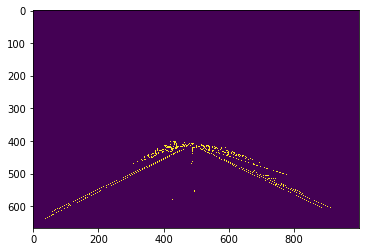

In [31]:
m_img=cv2.bitwise_and(canny,mask)
plt.figure()
plt.imshow(m_img)

Hough Tranform for line detection

In [34]:
rho=3
theta=np.pi/180
threshold=80

lines=cv2.HoughLinesP(m_img,rho,theta,threshold,np.array([]),minLineLength=100,maxLineGap=50)

l_img=np.zeros((m_img.shape[0],m_img.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(l_img,(x1,y1),(x2,y2),[0,255,0],6)


In [35]:
lines

array([[[140, 576, 497, 409]],

       [[479, 408, 803, 566]],

       [[ 58, 625, 299, 507]],

       [[481, 408, 751, 533]],

       [[418, 401, 667, 454]],

       [[670, 490, 834, 570]],

       [[592, 444, 782, 505]],

       [[456, 404, 632, 438]],

       [[293, 509, 460, 427]],

       [[430, 401, 655, 449]],

       [[679, 491, 807, 553]],

       [[331, 453, 482, 407]],

       [[ 98, 596, 199, 551]],

       [[410, 410, 540, 414]],

       [[306, 470, 421, 401]],

       [[399, 416, 559, 416]],

       [[424, 401, 614, 438]],

       [[685, 492, 834, 564]],

       [[302, 470, 492, 408]],

       [[ 38, 638, 151, 571]],

       [[344, 459, 445, 403]],

       [[321, 464, 428, 402]],

       [[ 36, 639, 208, 551]],

       [[428, 406, 651, 454]],

       [[745, 515, 848, 576]],

       [[316, 463, 487, 408]],

       [[169, 566, 270, 521]],

       [[487, 417, 494, 557]],

       [[332, 461, 433, 403]],

       [[742, 528, 912, 604]],

       [[399, 413, 533, 413]],

       [

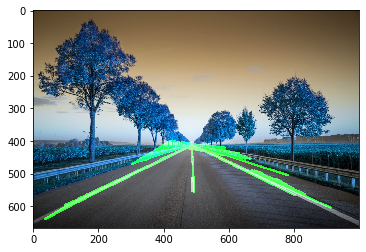

In [37]:
imgf=cv2.addWeighted(img,1,l_img,1,0)

plt.figure()
plt.imshow(imgf)